# 1. Import libraries and load dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_excel('Indianapolis.xlsx')
df.head()


,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Indianapolis,United States,39.768379,-86.158043,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,Indianapolis,United States,39.768379,-86.158043,2012-10-01 13:00:00,76.0,1011.0,283.850000,overcast clouds,40.0,4.0
2,Indianapolis,United States,39.768379,-86.158043,2012-10-01 14:00:00,76.0,1011.0,283.889394,overcast clouds,40.0,4.0
3,Indianapolis,United States,39.768379,-86.158043,2012-10-01 15:00:00,76.0,1011.0,283.941919,overcast clouds,40.0,4.0
4,Indianapolis,United States,39.768379,-86.158043,2012-10-01 16:00:00,76.0,1011.0,283.994444,overcast clouds,40.0,4.0


In [4]:
df.tail()

,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
45248,Indianapolis,United States,39.768379,-86.158043,2017-11-29 20:00:00,32.0,1025.0,285.98,sky is clear,110.0,3.0
45249,Indianapolis,United States,39.768379,-86.158043,2017-11-29 21:00:00,32.0,1024.0,286.17,sky is clear,110.0,3.0
45250,Indianapolis,United States,39.768379,-86.158043,2017-11-29 22:00:00,39.0,1024.0,284.21,sky is clear,110.0,3.0
45251,Indianapolis,United States,39.768379,-86.158043,2017-11-29 23:00:00,52.0,1024.0,283.20,sky is clear,80.0,1.0
45252,Indianapolis,United States,39.768379,-86.158043,2017-11-30 00:00:00,52.0,1023.0,282.78,broken clouds,70.0,1.0


In [6]:
df.shape


(45253, 11)

In [7]:
df.describe

<bound method NDFrame.describe of                City        Country   Latitude  Longitude            datetime  \
0      Indianapolis  United States  39.768379 -86.158043 2012-10-01 12:00:00   
1      Indianapolis  United States  39.768379 -86.158043 2012-10-01 13:00:00   
2      Indianapolis  United States  39.768379 -86.158043 2012-10-01 14:00:00   
3      Indianapolis  United States  39.768379 -86.158043 2012-10-01 15:00:00   
4      Indianapolis  United States  39.768379 -86.158043 2012-10-01 16:00:00   
...             ...            ...        ...        ...                 ...   
45248  Indianapolis  United States  39.768379 -86.158043 2017-11-29 20:00:00   
45249  Indianapolis  United States  39.768379 -86.158043 2017-11-29 21:00:00   
45250  Indianapolis  United States  39.768379 -86.158043 2017-11-29 22:00:00   
45251  Indianapolis  United States  39.768379 -86.158043 2017-11-29 23:00:00   
45252  Indianapolis  United States  39.768379 -86.158043 2017-11-30 00:00:00   

     

In [8]:
df.columns


Index(['City', 'Country', 'Latitude', 'Longitude', 'datetime', 'Humidity',
       'Pressure', 'Temperature', 'Weather Description', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [9]:
df.nunique()#gives the no of unique values

City                       1
Country                    1
Latitude                   1
Longitude                  1
datetime               45253
Humidity                  83
Pressure                 100
Temperature            16272
Weather Description       28
Wind Direction           361
Wind Speed                19
dtype: int64

In [10]:
#unique values for a particular row
df['Weather Description'].unique()

array([nan, 'overcast clouds', 'broken clouds', 'light rain',
       'moderate rain', 'light intensity drizzle', 'heavy intensity rain',
       'mist', 'drizzle', 'scattered clouds', 'few clouds',
       'sky is clear', 'thunderstorm', 'proximity thunderstorm',
       'thunderstorm with rain', 'heavy intensity drizzle', 'fog', 'haze',
       'heavy snow', 'snow', 'thunderstorm with light rain',
       'freezing rain', 'light snow', 'proximity thunderstorm with rain',
       'thunderstorm with heavy rain', 'very heavy rain', 'squalls',
       'thunderstorm with light drizzle', 'light intensity shower rain'],
      dtype=object)

# 2.Check for missing values

In [2]:
df.isnull().sum()#gives missing values column wise

City                     0
Country                  0
Latitude                 0
Longitude                0
datetime                 0
Humidity               695
Pressure               289
Temperature              7
Weather Description      1
Wind Direction           1
Wind Speed               1
dtype: int64

In [11]:
df.isnull().sum().sum()#gives total missing values

994

# 3. Checking the data types of each attribute.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 45253 non-null  object        
 1   Country              45253 non-null  object        
 2   Latitude             45253 non-null  float64       
 3   Longitude            45253 non-null  float64       
 4   datetime             45253 non-null  datetime64[ns]
 5   Humidity             44558 non-null  float64       
 6   Pressure             44964 non-null  float64       
 7   Temperature          45246 non-null  float64       
 8   Weather Description  45252 non-null  object        
 9   Wind Direction       45252 non-null  float64       
 10  Wind Speed           45252 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 3.8+ MB


# 4. Checking for wrong entries like symbols -,?,#,*,etc.

In [4]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

City : ['Indianapolis']
Country : ['United States']
Latitude : [39.768379]
Longitude : [-86.158043]
datetime : ['2012-10-01T12:00:00.000000000' '2012-10-01T13:00:00.000000000'
 '2012-10-01T14:00:00.000000000' ... '2017-11-29T22:00:00.000000000'
 '2017-11-29T23:00:00.000000000' '2017-11-30T00:00:00.000000000']
Humidity : [ nan  76.  71.  65.  59.  77.  82.  87.  93.  96. 100.  95.  97.  63.
  68.  56.  60.  52.  67.  72.  78.  81.  84.  64.  53.  47.  39.  41.
  44.  90.  86.  70.  61.  57.  75.  80.  28.  49.  45.  50.  58.  43.
  40.  30.  37.  83.  66.  54.  51.  48.  42.  62.  69.  74.  46.  38.
  22.  88.  55.  31.  33.  79.  92.  73.  36.  29.  27.  32.  34.  19.
  85.  25.  91.  94.  89.  23.  98.  99.  20.  21.  24.  35.  26.  16.]
Pressure : [  nan 1011. 1010. 1009. 1008. 1007. 1006. 1005. 1012. 1013. 1014. 1015.
 1016. 1017. 1018. 1019. 1020. 1021. 1022. 1023. 1024.  996. 1002. 1025.
 1026. 1027. 1029. 1028. 1004. 1003.  994. 1001. 1000.  998.  997.  999.
 1030. 1031. 1032. 10

# 5. Visualizing the missing values

<AxesSubplot:>

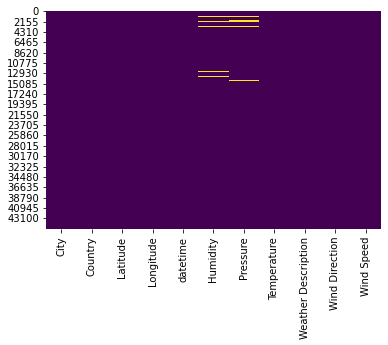

In [5]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

We can see that there are missing values only in humidity and pressure. Among these, more values are missing in column of humidity.

# 6.Replacing the missing values

In [20]:
#filling missing values with next rows data
df.head()
df1=df.fillna(method='bfill')
df1


,City,Country,Latitude,Longitude,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Indianapolis,United States,39.768379,-86.158043,2012-10-01 12:00:00,76.0,1011.0,283.850000,overcast clouds,40.0,4.0
1,Indianapolis,United States,39.768379,-86.158043,2012-10-01 13:00:00,76.0,1011.0,283.850000,overcast clouds,40.0,4.0
2,Indianapolis,United States,39.768379,-86.158043,2012-10-01 14:00:00,76.0,1011.0,283.889394,overcast clouds,40.0,4.0
3,Indianapolis,United States,39.768379,-86.158043,2012-10-01 15:00:00,76.0,1011.0,283.941919,overcast clouds,40.0,4.0
4,Indianapolis,United States,39.768379,-86.158043,2012-10-01 16:00:00,76.0,1011.0,283.994444,overcast clouds,40.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
45248,Indianapolis,United States,39.768379,-86.158043,2017-11-29 20:00:00,32.0,1025.0,285.980000,sky is clear,110.0,3.0
45249,Indianapolis,United States,39.768379,-86.158043,2017-11-29 21:00:00,32.0,1024.0,286.170000,sky is clear,110.0,3.0
45250,Indianapolis,United States,39.768379,-86.158043,2017-11-29 22:00:00,39.0,1024.0,284.210000,sky is clear,110.0,3.0
45251,Indianapolis,United States,39.768379,-86.158043,2017-11-29 23:00:00,52.0,1024.0,283.200000,sky is clear,80.0,1.0


In [18]:
df1.isnull().sum().sum()

0

In [21]:
#Removing unnecessary columns
df2=df1.drop(['Latitude','Longitude'],axis=1)
df2.head()

,City,Country,datetime,Humidity,Pressure,Temperature,Weather Description,Wind Direction,Wind Speed
0,Indianapolis,United States,2012-10-01 12:00:00,76.0,1011.0,283.850000,overcast clouds,40.0,4.0
1,Indianapolis,United States,2012-10-01 13:00:00,76.0,1011.0,283.850000,overcast clouds,40.0,4.0
2,Indianapolis,United States,2012-10-01 14:00:00,76.0,1011.0,283.889394,overcast clouds,40.0,4.0
3,Indianapolis,United States,2012-10-01 15:00:00,76.0,1011.0,283.941919,overcast clouds,40.0,4.0
4,Indianapolis,United States,2012-10-01 16:00:00,76.0,1011.0,283.994444,overcast clouds,40.0,4.0


# 7. Relationship analysis

<AxesSubplot:>

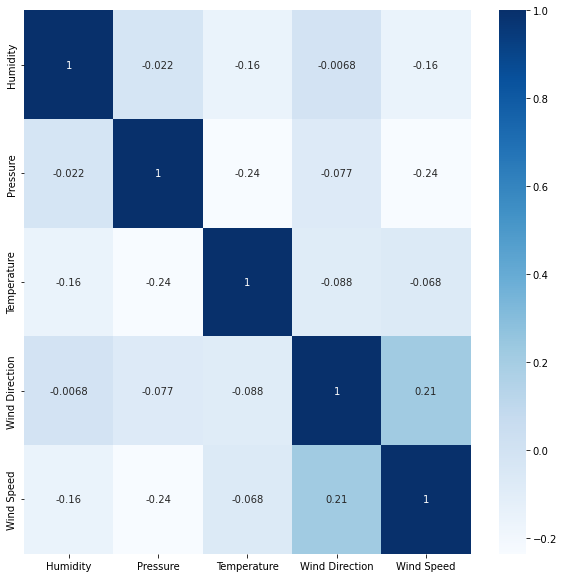

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cbar=True,annot=True,cmap='Blues')

Using pairplot

In [24]:
df2.corr()

,Humidity,Pressure,Temperature,Wind Direction,Wind Speed
Humidity,1.000000,-0.022367,-0.157239,-0.006765,-0.157236
Pressure,-0.022367,1.000000,-0.236216,-0.076781,-0.235346
Temperature,-0.157239,-0.236216,1.000000,-0.088401,-0.068361
Wind Direction,-0.006765,-0.076781,-0.088401,1.000000,0.213162
Wind Speed,-0.157236,-0.235346,-0.068361,0.213162,1.000000


<AxesSubplot:>

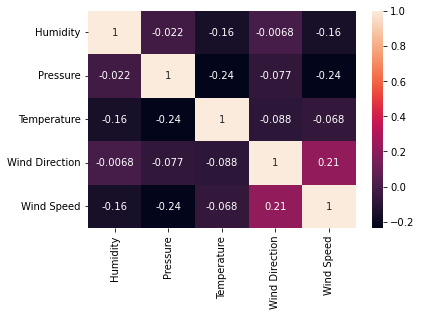

In [25]:
correlation=df2.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# 8. Pair plots

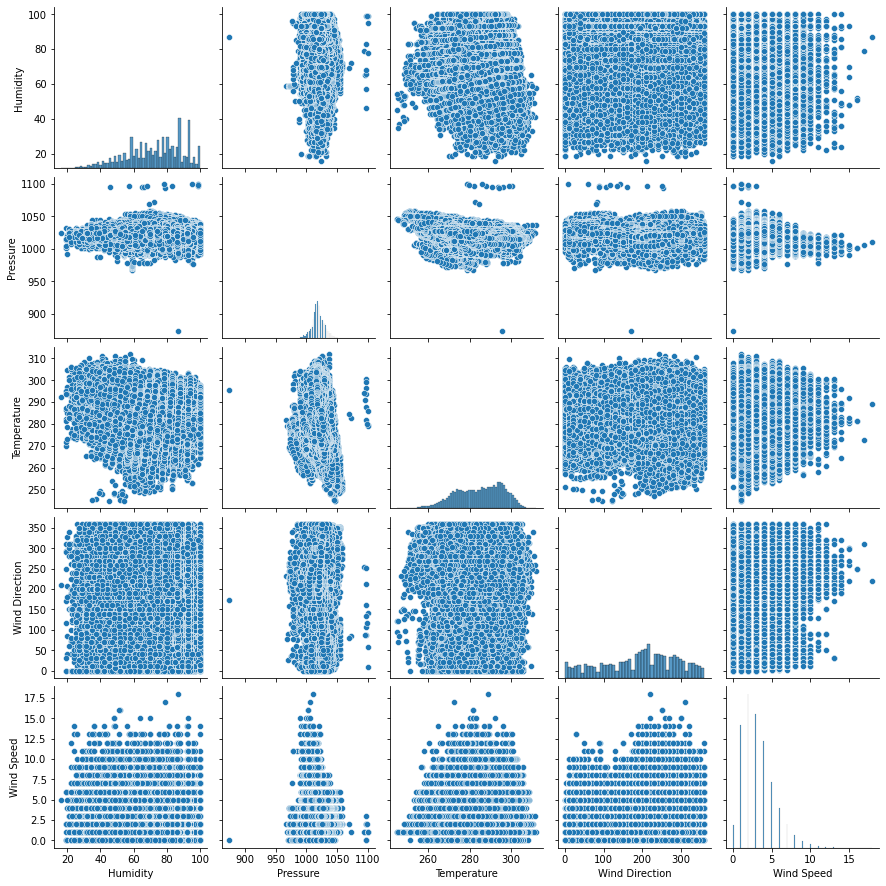

In [26]:
sns.pairplot(df2)

# 9. Scatter plots

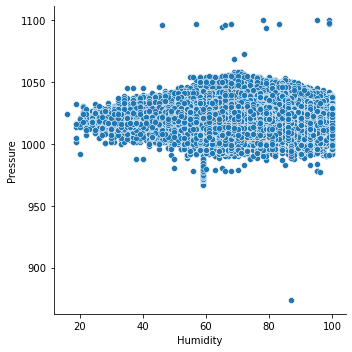

In [27]:
sns.relplot(x='Humidity',y='Pressure',data=df2)

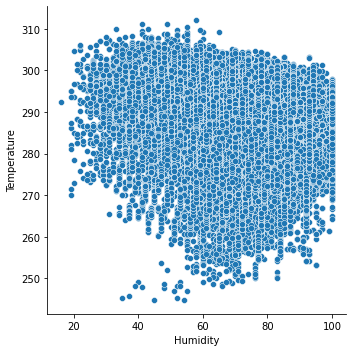

In [28]:
sns.relplot(x='Humidity',y='Temperature',data=df2)

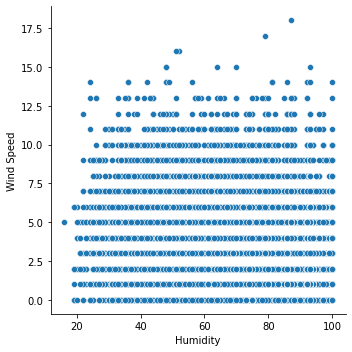

In [31]:
sns.relplot(x='Humidity',y='Wind Speed',data=df2)

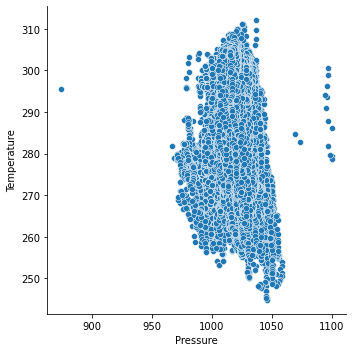

In [33]:
sns.relplot(x='Pressure',y='Temperature',data=df2)

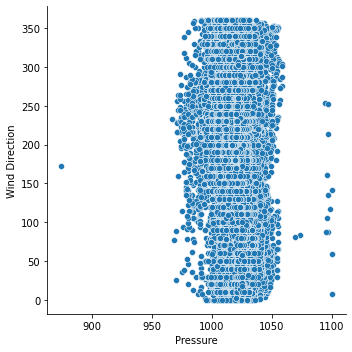

In [36]:
sns.relplot(x='Pressure',y='Wind Direction',data=df2)

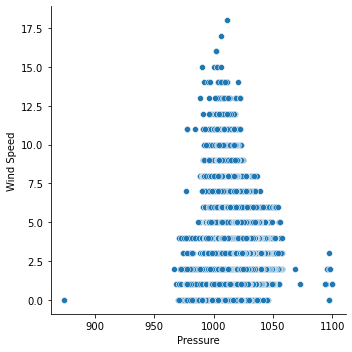

In [37]:
sns.relplot(x='Pressure',y='Wind Speed',data=df2)

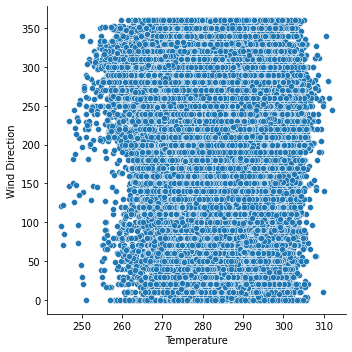

In [38]:
sns.relplot(x='Temperature',y='Wind Direction',data=df2)

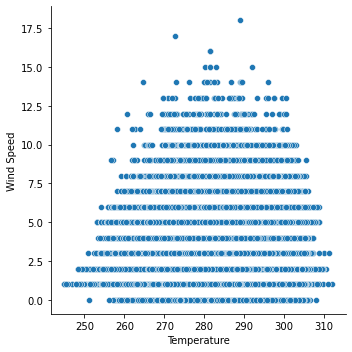

In [39]:
sns.relplot(x='Temperature',y='Wind Speed',data=df2)

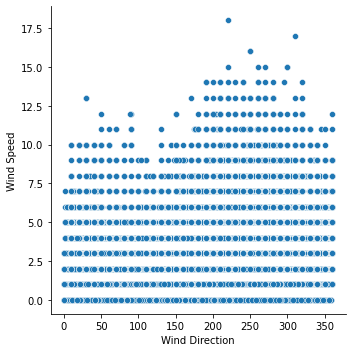

In [40]:
sns.relplot(x='Wind Direction',y='Wind Speed',data=df2)

# 10. Histogram Plots

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

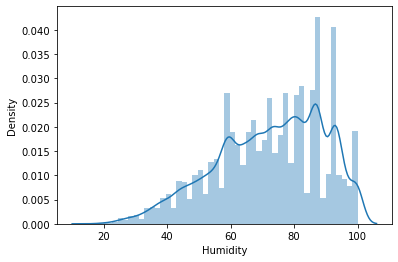

In [41]:
sns.distplot(df2['Humidity'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure', ylabel='Density'>

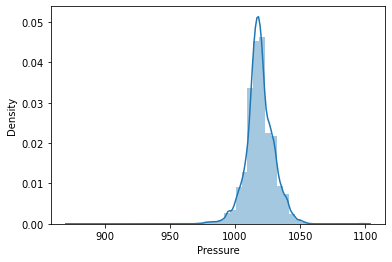

In [42]:
sns.distplot(df2['Pressure'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

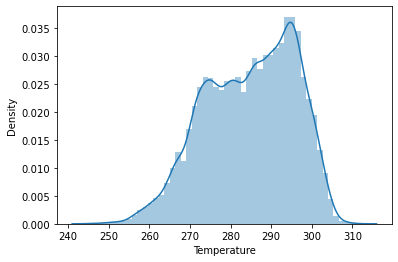

In [43]:
sns.distplot(df2['Temperature'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Direction', ylabel='Density'>

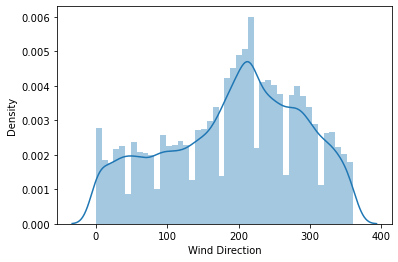

In [44]:
sns.distplot(df2['Wind Direction'])

C:\Users\Sachin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind Speed', ylabel='Density'>

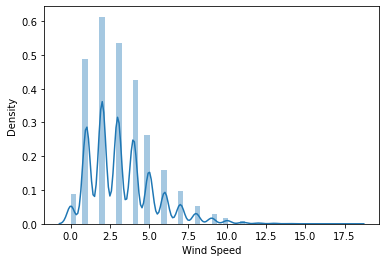

In [45]:
sns.distplot(df2['Wind Speed'])

# 11. Box Plot

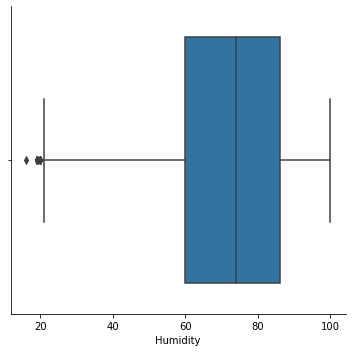

In [46]:
sns.catplot(x='Humidity',kind='box',data=df2)

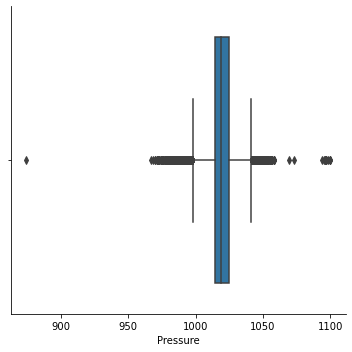

In [47]:
sns.catplot(x='Pressure',kind='box',data=df2)

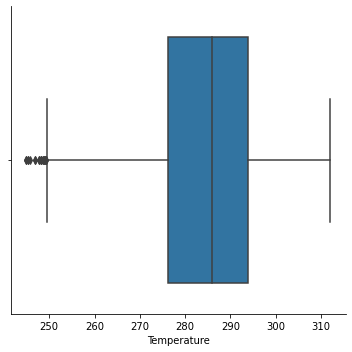

In [48]:
sns.catplot(x='Temperature',kind='box',data=df2)

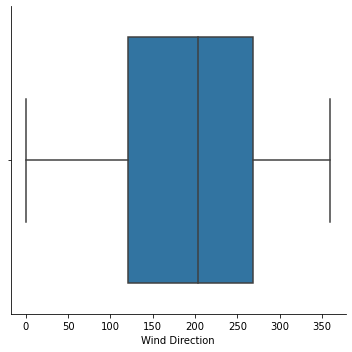

In [49]:
sns.catplot(x='Wind Direction',kind='box',data=df2)

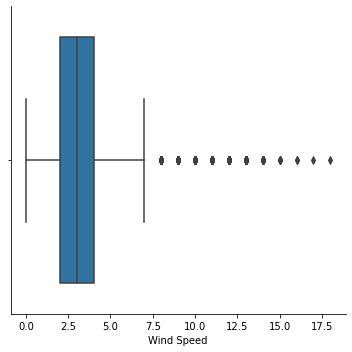

In [50]:
sns.catplot(x='Wind Speed',kind='box',data=df2)